In [1]:
#!/usr/bin/env python3
"""
Neven Caplar 
Last updated: 2023-10-07

Goals: 
Fit the data

Each Section can/should run independently,
only these initial imports should be shared among all sections

Questions:
What determines memory limit of the workers
How to partition the dataframe in order to get more workers active


"""
import numpy as np
import pandas as pd
import pyarrow as pa

# from scipy.spatial import KDTree
import matplotlib.pyplot as plt

import JaxPeriodDrwFit


from tape.ensemble import Ensemble
from tape.utils import ColumnMapper


from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [2]:
import dask
# many workers
# dask.config.set(scheduler='threads') 

# does not work
# from multiprocessing.pool import ThreadPool
# dask.config.set(pool=ThreadPool(20))

# one worker
# dask.config.set(scheduler='processes')  
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)
# cluster.adapt(minimum=10, maximum=40) 

/astro/users/wbeebe/tape/jax/celerite/notebooks_lf/PeriodDrw/.conda/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33264 instead
  warnings.warn(


In [3]:
ens = Ensemble(client = client)  # initialize an ensemble object
ens.client_info()


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:33264/status,
Dashboard: http://127.0.0.1:33264/status,Workers: 8
Total threads: 64,Total memory: 251.68 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38427,Workers: 8
Dashboard: http://127.0.0.1:33264/status,Total threads: 64
Started: Just now,Total memory: 251.68 GiB
Comm: tcp://127.0.0.1:37292,Total threads: 8
Dashboard: http://127.0.0.1:44851/status,Memory: 31.46 GiB
Nanny: tcp://127.0.0.1:36371,


In [4]:
# Tape Single Pixel - real data 

# Tape Single Pixel - real data 

In [5]:
# if running on baldur
data_path = "/astro/store/epyc/data3/hipscat/catalogs/tape_test/"

col_map = ColumnMapper(id_col="SDSS_NAME_dr16q_constant", 
                       time_col="mjd_ztf_source",
                       flux_col="mag_ztf_source", 
                       err_col="magerr_ztf_source",
                       band_col="band_ztf_source")

ens.from_hipscat(data_path,
                 source_subdir="tape_test_sources",
                 object_subdir="tape_test_obj",
                 column_mapper=col_map,
                 additional_cols=True,
                 sync_tables=False,
                 sort=False,
                 )

/astro/users/wbeebe/tape/jax/celerite/notebooks_lf/PeriodDrw/.conda/lib/python3.10/site-packages/dask/dataframe/core.py:5400: UserWarning: New index has same name as existing, this is a no-op.
  warnings.warn(
/astro/users/wbeebe/tape/jax/celerite/notebooks_lf/PeriodDrw/.conda/lib/python3.10/site-packages/dask/dataframe/core.py:5400: UserWarning: New index has same name as existing, this is a no-op.
  warnings.warn(


In [6]:
def med_mag(mag):
    mag_no_nan = mag[~np.isnan(mag)]
    return np.median(mag_no_nan)

In [7]:
ens.query("band_ztf_source == 'g'", table = 'source')
ens.prune(10)
#med_mag_res = ens.batch(med_mag, ens._flux_col, compute=False)
#ens.assign(g_med_mag = med_mag_res)
#ens.query("g_med_mag < 20", table = 'object')
ens.query("rMeanPSFMag_ps1_otmo < 20", table = 'object')

In [8]:
ens._object.compute()

,_hipscat_index,PLATE_dr16q_constant,MJD_dr16q_constant,FIBERID_dr16q_constant,RA_dr16q_constant,DEC_dr16q_constant,OBJID_dr16q_constant,IF_BOSS_SDSS_dr16q_constant,Z_DR16Q_dr16q_constant,SOURCE_Z_DR16Q_dr16q_constant,...,yMeanPSFMag_ps1_otmo,yMeanPSFMagErr_ps1_otmo,yFlags_ps1_otmo,Norder_ps1_otmo,Dir_ps1_otmo,Npix_ps1_otmo,_DIST,Norder,Dir,nobs_total
SDSS_NAME_dr16q_constant,,,,,,,,,,,,,,,,,,,,,
b'024341.05-010243.3',4996749735944519680,4240,55455,178,40.921044,-1.045386,b'4240-55455-0178',b'BOSS',2.369000,b'VI',...,19.193501,0.039844,115000,5,0,4438,0.000016,5,0,252
b'024234.93-010351.9',4996754941277110272,6782,56572,334,40.645567,-1.064436,b'6782-56572-0334',b'BOSS',1.373000,b'VI',...,19.281900,0.050055,115000,5,0,4438,0.000004,5,0,241
b'024347.34-005354.9',4996771631947841536,3651,55247,294,40.947287,-0.898595,b'3651-55247-0294',b'BOSS',0.237000,b'VI',...,18.469999,0.044246,16892216,5,0,4438,0.000009,5,0,279
b'024347.11-004949.3',4996775603542687744,6782,56572,297,40.946311,-0.830385,b'6782-56572-0297',b'BOSS',0.565000,b'VI',...,19.084700,0.032752,115000,5,0,4438,0.000015,5,0,45
b'024425.39-004653.0',4996818172750331904,6782,56602,218,41.105805,-0.781410,b'6782-56602-0218',b'BOSS',0.936000,b'VI',...,18.399401,0.061579,115000,5,0,4438,0.000013,5,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b'024419.10+005539.2',4997824956667527168,6782,56572,772,41.079588,0.927557,b'6782-56572-0772',b'BOSS',0.821000,b'VI',...,19.677601,0.056099,115000,5,0,4438,0.000017,5,0,346
b'024221.87+004912.7',4997837085797777408,9381,57758,79,40.591144,0.820204,b'9381-57758-0079',b'BOSS',2.060000,b'VI',...,17.924200,0.020761,115000,5,0,4438,0.000016,5,0,370
b'024200.53+005322.2',4997845805743210496,6782,56572,610,40.502233,0.889509,b'6782-56572-0610',b'BOSS',0.964000,b'VI',...,18.615900,0.030714,115000,5,0,4438,0.000010,5,0,657


In [9]:
ens_nobs = ens.calc_nobs(temporary=False)

In [10]:
len(ens_nobs._object['nobs_total'].compute().values)

127

(17.0, 21.0)

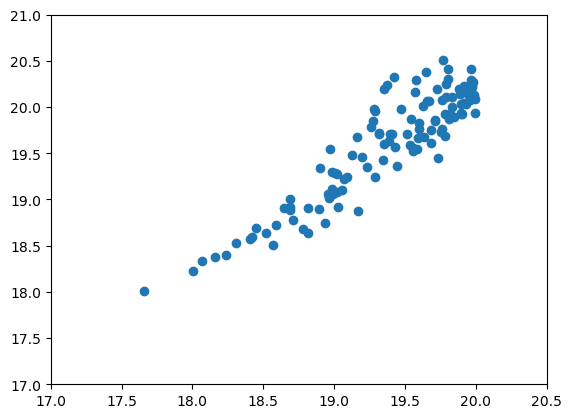

In [11]:
plt.scatter(ens._object['rMeanPSFMag_ps1_otmo'].compute().values, ens._object['gMeanPSFMag_ps1_otmo'].compute().values)
plt.xlim(17,20.5)
plt.ylim(17,21)

(17.0, 23.0)

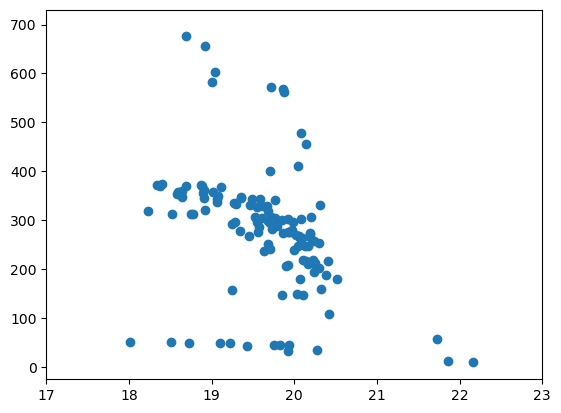

In [12]:
plt.scatter( ens._object['gMeanPSFMag_ps1_otmo'].compute().values,ens_nobs._object['nobs_total'].compute().values)
plt.xlim(17,23)

(array([ 4.,  9.,  4.,  0.,  1.,  0.,  2.,  3.,  3.,  4.,  7.,  6.,  8.,
        13., 14.,  7., 17.,  7.,  6.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,
         0.,  2.,  2.,  1.,  0.,  0.,  1.,  1.,  1.]),
 array([ 10.,  30.,  50.,  70.,  90., 110., 130., 150., 170., 190., 210.,
        230., 250., 270., 290., 310., 330., 350., 370., 390., 410., 430.,
        450., 470., 490., 510., 530., 550., 570., 590., 610., 630., 650.,
        670., 690., 710.]),
 <BarContainer object of 35 artists>)

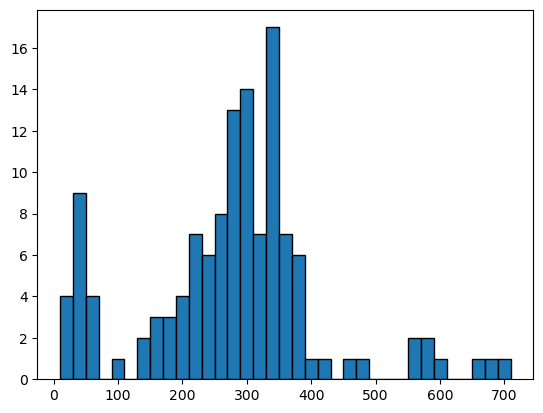

In [13]:

data = ens_nobs._object['nobs_total'].compute().values

bin_edges = range(min(data), max(data) + 21, 20) 
plt.hist(data, bins=bin_edges, edgecolor='k')  # 'k' sets black color for edges


In [14]:
# ens._source = ens._source.repartition(npartitions = 40)

In [17]:
# 9min, 13 sec on baldur, for 603 sources in 4 partitions
# 7min, 30 sec on baldur, for 603 sources in 4 partitions, Nov 7
# 5min, 14 sec on baldur, for 603 sources in 10 partitions, Nov 7

# 3min, 3 sec on baldur, with padding 
JaxPeriodDrwFit_instance = JaxPeriodDrwFit.JaxPeriodDrwFit()
res_tsp = ens.batch(JaxPeriodDrwFit_instance.optimize_map, 'mjd_ztf_source', "mag_ztf_source", "magerr_ztf_source",
                compute=True, meta=None, n_init=100, minimize=False)

In [18]:
res_tsp.head(10)

SDSS_NAME_dr16q_constant
b'024050.36-003109.0'    [[1.0, 44.316889784094414, 1.8989801385795584,...
b'024052.82-004110.9'    [[1.0, -34.93229835469431, 1.8810630123315244,...
b'024126.71-004526.3'    [[1.0, -28.066417378638267, 2.261459275250979,...
b'024151.76-001953.6'    [[1.0, 36.946966966641014, 3.9925843887854455,...
b'024154.42-004757.6'    [[1.0, -12.79280835467549, 1.8669201750244722,...
b'024204.58-003835.7'    [[1.0, -1.279144474205557, 1.8735110804720332,...
b'024207.19-002818.9'    [[1.0, -84.81340772363473, 1.994455067782365, ...
b'024214.97-003131.8'    [[1.0, -7.75360026960896, 2.1115669102452084, ...
b'024220.73-002059.7'    [[1.0, -110.75044511001548, 1.9889708399307289...
b'024231.07-001228.0'    [[1.0, -11.418457814678238, 2.266951626009501,...
Name: SDSS_NAME_dr16q_constant, dtype: object

In [19]:
res_tsp.loc[b'024050.36-003109.0']

array([[ 1.00000000e+00,  4.43168898e+01,  1.89898014e+00,
        -2.70415317e+00,  3.65292735e+00, -2.55962657e+00,
         1.87270059e+00, -2.84285407e+00,  3.21015823e+00,
        -2.85787527e+00],
       [ 2.00000000e+00,  3.97738636e+01,  3.21540866e+00,
        -7.60632721e-01,  1.43721299e+00, -1.47924108e+00,
         4.75357153e+00,  1.82052056e-01,  4.20699825e-01,
        -1.53877476e+00],
       [ 3.00000000e+00,  4.37869969e+01,  2.70362788e+00,
         5.01131229e-02, -4.12618768e+01, -2.96546736e+00,
         3.65996971e+00, -1.42822009e+00,  8.08143570e-01,
        -1.51325342e+00],
       [ 4.00000000e+00,  4.00899097e+01,  2.98009891e+00,
        -7.60837304e-01,  4.08457718e+00, -3.84270744e+00,
         2.99329242e+00, -4.57146544e-01,  4.49277094e+00,
        -1.24706777e+00],
       [ 5.00000000e+00,  4.43856505e+01, -4.73590276e+01,
        -1.69079841e+01, -2.35333883e+01, -6.32903577e+00,
         7.80093202e-01,  1.53783237e+00,  3.03214530e+00,
        -1.

In [20]:
res_tsp

SDSS_NAME_dr16q_constant
b'024050.36-003109.0'    [[1.0, 44.316889784094414, 1.8989801385795584,...
b'024052.82-004110.9'    [[1.0, -34.93229835469431, 1.8810630123315244,...
b'024126.71-004526.3'    [[1.0, -28.066417378638267, 2.261459275250979,...
b'024151.76-001953.6'    [[1.0, 36.946966966641014, 3.9925843887854455,...
b'024154.42-004757.6'    [[1.0, -12.79280835467549, 1.8669201750244722,...
                                               ...                        
b'024419.10+005539.2'    [[1.0, -94.8858486682791, 2.0071596935522655, ...
b'024448.90+002858.6'    [[1.0, -65.47185360071788, 1.8958800394491615,...
b'024504.47+002841.3'    [[1.0, 22.287532337780725, 1.977668077387151, ...
b'024508.67+003710.6'    [[1.0, 23.95335965172896, 1.9787036858696767, ...
b'024514.80+003923.3'    [[1.0, 21.94655574702604, 1.9734545203608596, ...
Name: SDSS_NAME_dr16q_constant, Length: 127, dtype: object

In [21]:
JaxPeriodDrwFit_instance = JaxPeriodDrwFit.JaxPeriodDrwFit()
res_tsp_drw = ens.batch(JaxPeriodDrwFit_instance.optimize_map_drw, 'mjd_ztf_source', "mag_ztf_source", "magerr_ztf_source",
                compute=True, meta=None, minimize=False, n_init=100)

In [120]:
username="wbeebe"
def pack_output_to_parquet(result, columns, output_dir, output_filename):
    """Packs output to a dataframe, written as a parquet file. The created dataframe object is returned for inspection."""
    dfs = []
    for i in range(len(result)):
        obj_data = result.iloc[i]
        obj_index = pd.Series(np.full(len(obj_data), result.index[i]), name=result.index.name)
        dfs.append(pd.DataFrame(data=obj_data, columns=columns, index=obj_index))
    result_df = pd.concat(dfs)
    pa_table = pa.Table.from_pandas(result_df)
    pa_table
    pa.parquet.write_table(pa_table, f"{output_dir}/data/{output_filename}.parquet")
    return result_df

def pack_min_likelihood_to_parquet(df, likelihood_col, output_dir, output_filename, drop_cols=["iter"], single_sol=True):
    """Packs output to a dataframe, written as a parquet file. The created dataframe object is returned for inspection."""
    dfs = []
    for obj_id in df.index.unique():
        obj_df = df.loc[obj_id]
        min_df = obj_df[obj_df[likelihood_col] == obj_df[likelihood_col].min()]
        min_df = min_df.drop(columns=drop_cols)
        if single_sol:
            min_df = min_df.head(1)
        dfs.append(min_df)
    result_df = pd.concat(dfs)
    pa_table = pa.Table.from_pandas(result_df)
    pa_table
    pa.parquet.write_table(pa_table, f"{output_dir}/data/{output_filename}.parquet")
    return result_df

In [148]:
param_cols = ['log_drw_scale', 'log_drw_amp', 'log_per_scale', 'log_per_amp']
init_param_cols = ["init_" + c for c in param_cols]
columns = ['iter', 'neg_log_lh'] + param_cols + init_param_cols
combined_df = pack_output_to_parquet(res_tsp, columns,
                       f"/astro/users/{username}", "res_tsp_run_g_full_0")
min_combined_df = pack_min_likelihood_to_parquet(combined_df, 'neg_log_lh', f"/astro/users/{username}", "res_tsp_run_g_min_0")

/astro/users/wbeebe/tape/jax/celerite/notebooks_lf/PeriodDrw/.conda/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/astro/users/wbeebe/tape/jax/celerite/notebooks_lf/PeriodDrw/.conda/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


In [150]:
combined_df

,iter,neg_log_lh,log_drw_scale,log_drw_amp,log_per_scale,log_per_amp,init_log_drw_scale,init_log_drw_amp,init_log_per_scale,init_log_per_amp
SDSS_NAME_dr16q_constant,,,,,,,,,,
b'024050.36-003109.0',1.0,44.316890,1.898980,-2.704153,3.652927,-2.559627,1.872701,-2.842854,3.210158,-2.857875
b'024050.36-003109.0',2.0,39.773864,3.215409,-0.760633,1.437213,-1.479241,4.753572,0.182052,0.420700,-1.538775
b'024050.36-003109.0',3.0,43.786997,2.703628,0.050113,-41.261877,-2.965467,3.659970,-1.428220,0.808144,-1.513253
b'024050.36-003109.0',4.0,40.089910,2.980099,-0.760837,4.084577,-3.842707,2.993292,-0.457147,4.492771,-1.247068
b'024050.36-003109.0',5.0,44.385650,-47.359028,-16.907984,-23.533388,-6.329036,0.780093,1.537832,3.032145,-1.003249
...,...,...,...,...,...,...,...,...,...,...
b'024514.80+003923.3',96.0,21.782404,2.279928,-0.969487,2.651342,-5.268798,2.468978,-1.253952,2.611216,-0.440417
b'024514.80+003923.3',97.0,21.782404,2.279927,-0.969484,4.185460,-4.684939,2.613664,0.629778,3.849968,-0.639365
b'024514.80+003923.3',98.0,21.788054,2.339169,-0.951459,4.660521,-2.532310,2.137705,1.485551,1.079105,-1.820266


In [151]:
min_combined_df

,neg_log_lh,log_drw_scale,log_drw_amp,log_per_scale,log_per_amp,init_log_drw_scale,init_log_drw_amp,init_log_per_scale,init_log_per_amp
SDSS_NAME_dr16q_constant,,,,,,,,,
b'024050.36-003109.0',39.083982,3.088500,-0.715306,1.468924,-1.164669,1.460723,-1.409983,0.468374,-1.184457
b'024052.82-004110.9',-35.156772,-12.493350,-10.902907,2.738975,-1.331822,0.232252,-0.446263,3.155693,-2.318740
b'024126.71-004526.3',-29.632743,-10.076967,-6.401982,2.944183,-1.101969,0.780093,1.537832,3.032145,-1.003249
b'024151.76-001953.6',31.643813,2.550391,-1.240236,1.469939,-1.185938,4.436064,-0.351747,1.432706,-0.935809
b'024154.42-004757.6',-12.792812,3.320252,-1.580990,-0.159079,-2.115329,2.137705,1.485551,1.079105,-1.820266
...,...,...,...,...,...,...,...,...,...
b'024419.10+005539.2',-97.450038,2.662360,-1.459577,2.504225,-1.096036,3.645036,-2.128168,2.507581,-2.122817
b'024448.90+002858.6',-75.779812,2.488547,-1.149155,2.834314,-0.926675,4.609371,-1.789724,2.784006,-1.233347
b'024504.47+002841.3',12.178009,2.478015,-1.004705,3.046591,-0.992085,1.792329,1.683650,3.509834,-0.760212


In [155]:
param_cols = ['log_drw_scale', 'log_drw_amp']
init_param_cols = ["init_" + c for c in param_cols]
columns = ['iter', 'neg_log_lh'] + param_cols + init_param_cols
drw_df = pack_output_to_parquet(res_tsp_drw, columns,
                       f"/astro/users/{username}", "res_tsp_run_g_full_drw_0")
min_drw_df = pack_min_likelihood_to_parquet(drw_df, 'neg_log_lh', f"/astro/users/{username}", "res_tsp_run_g_min_0_drw")

/astro/users/wbeebe/tape/jax/celerite/notebooks_lf/PeriodDrw/.conda/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/astro/users/wbeebe/tape/jax/celerite/notebooks_lf/PeriodDrw/.conda/lib/python3.10/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


In [153]:
drw_df

,iter,neg_log_lh,log_drw_scale,log_drw_amp,init_log_drw_scale,init_log_drw_amp
SDSS_NAME_dr16q_constant,,,,,,
b'024050.36-003109.0',1.0,41.100533,1.874229,-2.834812,1.872701,-2.842854
b'024050.36-003109.0',2.0,40.089910,2.980098,-0.760837,4.753572,0.182052
b'024050.36-003109.0',3.0,40.406710,2.691709,0.039295,3.659970,-1.428220
b'024050.36-003109.0',4.0,40.089910,2.980099,-0.760837,2.993292,-0.457147
b'024050.36-003109.0',5.0,40.583519,8.919517,0.937089,0.780093,1.537832
...,...,...,...,...,...,...
b'024514.80+003923.3',96.0,21.796892,2.354942,-1.023534,2.468978,-1.253952
b'024514.80+003923.3',97.0,21.782404,2.279928,-0.969485,2.613664,0.629778
b'024514.80+003923.3',98.0,21.782404,2.279927,-0.969487,2.137705,1.485551


In [154]:
min_drw_df

,neg_log_lh,log_drw_scale,log_drw_amp,init_log_drw_scale,init_log_drw_amp
SDSS_NAME_dr16q_constant,,,,,
b'024050.36-003109.0',40.089910,2.980099,-0.760837,3.534287,0.225864
b'024052.82-004110.9',-34.805998,-3.807629,-4.933484,0.979914,0.808098
b'024126.71-004526.3',-28.434609,2.066565,-1.248880,1.872701,-2.842854
b'024151.76-001953.6',35.285865,2.441909,-1.277017,3.854836,-1.304851
b'024154.42-004757.6',-12.792811,1.545028,-4.170314,1.554912,-1.710292
...,...,...,...,...,...
b'024419.10+005539.2',-94.101120,2.633371,-0.931073,2.623782,-2.067150
b'024448.90+002858.6',-72.338187,2.415671,-0.888955,3.037724,-0.912945
b'024504.47+002841.3',13.080527,2.468771,-0.839532,1.792329,1.683650


In [171]:
min_df

neg_log_lh
SDSS_NAME_dr16q_constant log_drw_scale log_drw_amp init_log_drw_scale init_log_drw_amp            
b'023759.19+000044.2'    -14.376643    -4.394664   0.442463            0.360678         -45.673739
                         -12.882860    -4.509196   0.488361            0.515095         -45.673740
                         -8.666973     -3.396270   0.127096            1.435432         -45.673541
                         -7.461534     -4.425407   0.979914            0.808098         -45.673739
                         -6.291422     -4.448496   1.626652            0.641082         -45.673739
...                                                                                            ...
b'024748.87-000147.5'     4.539668     -4.059335   4.546602           -1.495608         -12.183691
                          4.603578     -4.160344   4.609371           -1.789724         -12.183692
                          4.693922     -4.051793   4.697495           -2.275526         -12.183691
                          4.739689     -4.135643   4.744428           -1.311924         -12.183691
                          4.846744     -4.171497   4.849549           -2.193894         -12.183692

[12700 rows x 1 columns]

In [167]:
list(df.columns)

['iter',
 'neg_log_lh',
 'log_drw_scale',
 'log_drw_amp',
 'init_log_drw_scale',
 'init_log_drw_amp']